Universidade Federal do Rio Grande do Sul (UFRGS)   
Programa de Pós-Graduação em Engenharia Civil (PPGEC)   

# PEC00025: Introduction to Vibration Theory


### Trabalho 2.1 - Estrutura experimental

**Aluna:** Marcela Sousa Mossmann

**Cartão UFRGS:** 250197

In [213]:
# Importing Python modules required for this notebook
# (this cell must be executed with "shift+enter" before any other Python cell)

import numpy as np
import scipy.linalg as sp
import matplotlib.pyplot as plt

### 1. Desenvolvimento da estrutura experimental



Para a criação da estrutura experimental utilizada neste trabalho, e que também será replicada aos próximos, foi utilizado o software [_Ftool_](https://www.ftool.com.br/Ftool/) para análise estrutural, onde conseguimos representar a análise elástica linear do modelo desenvolvido. Como o software é restrito à produção dessa análise, a estrutura em questão não será analisada dinamicamente, porém é possível obter a matriz de rigidez do modelo, através dos cálculos feitos adiante.

A estrutura experimental é explicitada abaixo, consiste em um modelo bi-engastado de edifício feito em concreto armado, com 10 andares de vãos medindo 4 metros cada, e altura dos pavimentos 3 metros. A seção dos pilares e vigas tem forma retangular 700x400mm.

<img src="Images/estrutura1.png" alt="Estrutura experimental" width="640px"/>
 
A estrutura deformada foi esboçada a mão, explicitada ao final dos cálculos seguintes.

Com auxílio do software _Ftool_ foram coletados os valores (Dx) deformados para cada força de 1 KN aplicada em todos os nós externos da estrutura, e arranjados em colunas para a construção da _matriz de flexibilidade H_, que deverá ser simétrica, de acordo com o teorema da reciprocidade de Maxwell-Betti. A matriz H (10x10) foi desenvolvida abaixo:

In [212]:
# Flexibility coefficients in m/N
H1 = np.array([[0.2909, 0.2554, 0.2183, 0.1819, 0.1468, 0.1136, 0.0828, 0.0549, 0.0304, 0.0105], 
               [0.2554, 0.2331, 0.2026, 0.1701, 0.1382, 0.1076, 0.0789, 0.0527, 0.0294, 0.0103], 
               [0.2183, 0.2026, 0.1844, 0.1579, 0.1295, 0.1016, 0.0751, 0.0506, 0.0285, 0.0101], 
               [0.1819, 0.1701, 0.1579, 0.1433, 0.1204, 0.0956, 0.0713, 0.0484, 0.0275, 0.0098],
               [0.1468, 0.1382, 0.1295, 0.1204, 0.1089, 0.0892, 0.0674, 0.0462, 0.0266, 0.0096],
               [0.1136, 0.1076, 0.1016, 0.0956, 0.0892, 0.0803, 0.0631, 0.0440, 0.0256, 0.0093],
               [0.0828, 0.0790, 0.0751, 0.0713, 0.0674, 0.0631, 0.0564, 0.0414, 0.0246, 0.0091],
               [0.0549, 0.0527, 0.0506, 0.0484, 0.0462, 0.0440, 0.0414, 0.0364, 0.0232, 0.0088],
               [0.0304, 0.0294, 0.0285, 0.0275, 0.0266, 0.0256, 0.0246, 0.0232, 0.0195, 0.0082],
               [0.0105, 0.0103, 0.0101, 0.0098, 0.0096, 0.0093, 0.0091, 0.0088, 0.0082, 0.0060]])*1e-6   



Para obtermos a matriz de rigidez K, é necessario executar a inversão de matriz: $\mathbf{H}^{-1} = \mathbf{K}$, assim obtemos:

$$ \mathbf{K} \vec{u} = \vec{F} $$

Para a estrutura experimental, foi calculada a matriz de rigidez pela inversão da matriz H de flexibilidade:

In [211]:
# Stiffness coefficients in N/m
K1 = np.linalg.inv(H1) 

### 2. Matriz de massa

A _matriz de massa M_ foi calculada tendo como base o volume de cada elemento constituinte da estrutura experimental, e o peso específico de 400 kg/m³ para cada pavimento. A matriz M, que é diagonal, foi construída abaixo:


In [210]:
# Lumped mass matrix in kg
M1 = np.array([[448,  0,  0,  0,  0, 0, 0, 0, 0, 0], 
               [0,  448,  0,  0,  0, 0, 0, 0, 0, 0], 
               [0,  0,  448,  0,  0, 0, 0, 0, 0, 0], 
               [0,  0,  0,  448,  0, 0, 0, 0, 0, 0], 
               [0,  0,  0,  0,  448, 0, 0, 0, 0, 0],
               [0,  0,  0,  0,  0, 448, 0, 0, 0, 0],
               [0,  0,  0,  0,  0, 0, 448, 0, 0, 0],
               [0,  0,  0,  0,  0, 0, 0, 448, 0, 0],
               [0,  0,  0,  0,  0, 0, 0, 0, 448, 0], 
               [0,  0,  0,  0,  0, 0, 0, 0, 0, 448]])*1e4

w2,phi1=sp.eig(K1,M1)

### 3. Frequência e forma modal fundamental

Através dos autovalores e autovetores da _matriz K_, obtem-se para k=1, $\vec{\varphi}_k$, $\omega_k$, a forma modal e a frequência natural de vibração, respectivamente, da estrutura experimental construída. Abaixo constam os códigos utilizados e os deslocamentos nodais do modelo em questão:

In [276]:
# Uses scipy to solve the standard eigenvalue problem
w2, phi1 = sp.eig(K1, M1)

# Ensure ascending order of eigenvalues
iw   = w2.argsort()
w2  = w2[iw]
phis = phi1[:,iw]

# Eigenvalues to vibration frequencies
wk1  = np.sqrt(np.real(w2)) 
fk1  = wk1/2/np.pi

phit=phis

print (wk1)
print (fk1)

[ 0.46685027  1.60280322  3.12220915  4.66076411  6.40181069  8.19407215
 10.09302866 11.74412007 13.14721254 14.18982937]
[0.07430153 0.25509406 0.49691502 0.74178365 1.01887982 1.30412709
 1.6063554  1.86913476 2.09244386 2.25838149]


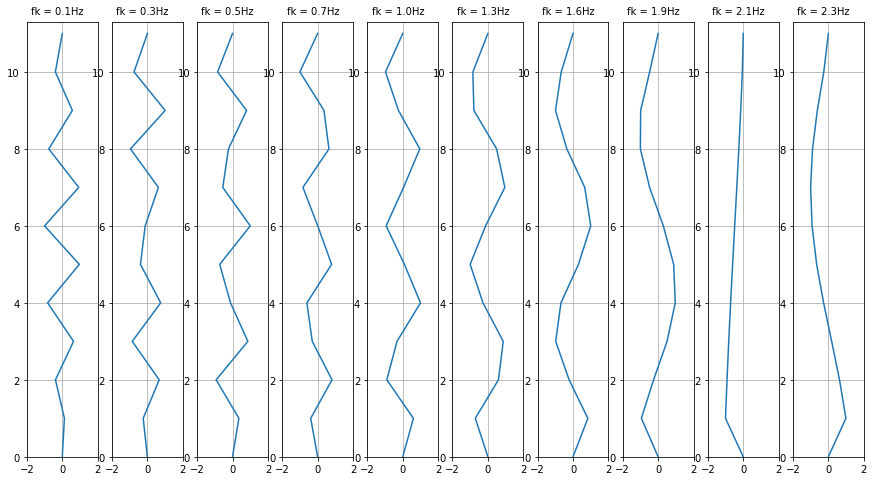

In [277]:
plt.figure(1, figsize=(15,8))
x = np.arange(12)

for k in range(10):
    pk = np.zeros(12);
    pk[1:-1] = Phi1[:,k]
    pk /= np.max(np.abs(pk))   # adjust scale for unity amplitude
    
    plt.subplot(1,10,k+1)
    plt.plot(pk, x)
    
    plt.xlim(-2, 2);
    plt.ylim(0, 11.3);  
    plt.text(-1.75, 11.5, 'fk = {0:3.1f}Hz'.format(fk1[k]));
    plt.grid(True)

### 4. Resposta a um impacto

Agora, para a resposta ao impacto forçado gerado no modelo experimental, foi calculada a velocidade inicial imposta ao topo do da estrutura através da força aplicada de 10 KN e da massa arbitrada para o sistema.




In [278]:
fmax = np.max(fk1)      # seleção da maior frequência
F0 = 10000              # força aplicada no nó do topo (N)
Tn = 1/fmax             # período calculado com fmax(s)
td = Tn/4               # td em função do perído (s)
m = 4480000             # massa do pavimento = 448𝑥10^4 𝑘𝑔
v0 = (F0*td)/m          # velocidade inicial aplicada no topo (m/s)

v0i=[v0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

uo_v =np.zeros(10)

print(v0)

0.0002470954166903228


#### 4.1 Cálculo do ângulo de fase (θk) e amplitude máxima (umax):
 Com a velocidade inicial obtida anteriormente, poderemos chegar ao ângulo de fase e deslocamento máximo através das relações:
 
 $$ \vec{\varphi}_i^T\mathbf{M} \,\vec{u_{o}} = -u_{imax} 
   \sin \left( -\theta_i \right)\mathbf{M_i} \ $$
   
 $$ \vec{\varphi}_i^T\mathbf{M} \,\vec{u_{o}} = u_{imax} 
   \cos \left( -\theta_i \right)\mathbf{M_i} \ $$



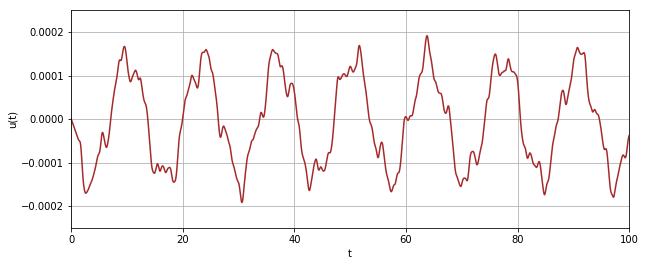

In [308]:
for k in range(10):

    phit[k] = phis[k].transpose()    #cálculo das transpostas dos autovalores
    
    
ang =  np.pi/2                     #ângulo pi/2
UMAX =np.zeros(10)                 #vetor dos deslocamentos máximos

for k in range (10):
    Mi=np.dot(np.dot(phit[k], M1), phis[k])      # Multiplicação das matrizes para obter massa modal Mi
    
    umax = (np.dot(np.dot(phit[k], M1),v0i)) /  (wk1[k] * np.sin(ang)* Mi) # Amplitudes máximas
   
    UMAX[k]=umax
    


t = np.linspace(0,100,10000)   #vetor representando o tempo.
uk = np.zeros((10, 10000))    # criando uma matriz 10x1000 para receber os valores de deslocamentos

for k in range(10):
    
            uk[k,:] = UMAX[k]*np.cos(-wk1[k]*t - ang)
 
u = np.dot(phis, uk)  #produto dos autovalores pela matriz de deslocamentos

plt.figure(2, figsize=(10,4))
plt.plot(t,u[0,:], color='brown') #plotando o 10º nó (maior deslocamento)
plt.xlim(0, 100); plt.xlabel("t");
plt.ylim(-0.00025,0.00025);  plt.ylabel("u(t)");
plt.grid(True)

#### 4.2 Cálculo do amortecimento:

Finalmente, podemos calcular o valor dos alfas, assumindo um amortecimento zeta=0,01.


In [330]:
zeta =np.zeros(10)
zeta[0] = 0.01
zeta[1] = 0.01

alpha1n = (zeta[1]*wk1[1]-zeta[0]*wk1[0])/(wk1[1]**2-wk1[0]**2)
alpha0n = (zeta[0]*wk1[0]-alpha1n*wk1[0]**2)


print("alpha0=",alpha0n, "\nalpha1=",alpha1n)

alpha0= 0.003615431848691071 
alpha1= 0.004831726692920222
